**Principal component analysis (PCA)** is a statistical procedure that uses an orthogonal (perpendicular) transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. If there are $n$ observations with $p$ variables, then the number of distinct principal components is $min{(n-1,p)}$. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal (perpendicular) to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables i.e. the variables need to be normalized before PCA so that one variable does not overshadow other. **PCA is done only for numeric variables.**

In [2]:
data("iris")
library(psych)

Warning message:
"package 'psych' was built under R version 3.4.3"

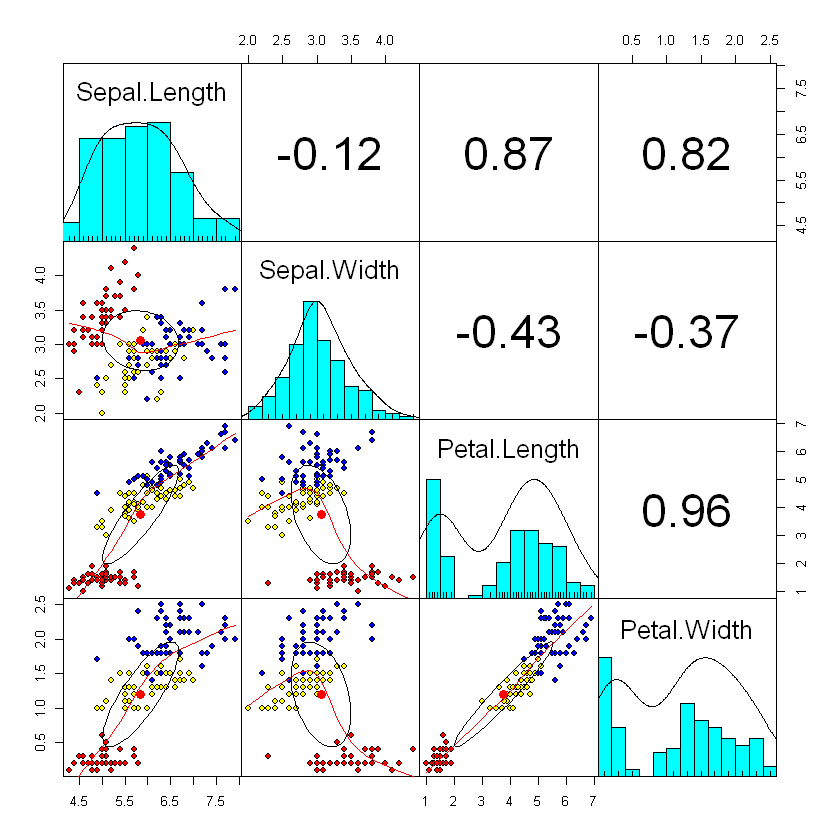

In [3]:
pairs.panels(x = iris[, -5] # for all the variables other than Species as it is a factor variable.
            , gap = 0
            , bg = c("red", "yellow", "blue")[iris$Species]
            , pch = 21
            )

Lower part gives the scatter plot and the upper part gives correlation coefficients. From the Scatter plot we can see that $Petal.Length$ and $Petal.Width$ are highly correlated with each other. 

The correlation coefficient lies between -1 and 1. Any correlation value near to zero denotes low correlation between variables. Any negative values denotes that variables are negatively correlated with each other i.e. one variable decreases as the other increases and vice versa. Positive value denotes the variables are positively correlated to each other i.e. the variables move in tandem and one increases if the other increaes and decreases if the other decreases. More the value is nearer to -1 or 1 denotes that the variables are **highly** negatively or positively correlated with each other. 

The correlation coefficient of $Petal.Length$ and $Petal.Width$ is very close to 1 which means that these are positively correlated with each other. 

When building the predictive model, high correlation between the independant variables can lead to **Multicollinearity problem** so the estimates that we get from the model are going to unstable and the predictions aren't accurate. **One way to handle this PCA.**

In [13]:
pc_iris = prcomp(x = iris[, -5] # For all indepandant variables only
                 , center = TRUE # So that the average = 0
                 , scale. = TRUE # To normalize the data before PCA. Note the period after scale 
                 )
cat("\nAttributes of PC for Iris\n")
print(attributes(pc_iris))
cat("\nAverage of the variables\n")
print(pc_iris$center)
cat("\nAverage of Sepal Length\n")
print(mean(iris$Sepal.Length))
cat("\nStandard Deviation of variables\n")
print(pc_iris$scale)
cat("\nStandard Deviation of Sepal Length\n")
print(sd(iris$Sepal.Length))
cat("\nPrinting pc_iris\n")
print(pc_iris)
cat("\nSummary of PC\n")
print(summary(pc_iris))


Attributes of PC for Iris
$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"


Average of the variables
Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333 

Average of Sepal Length
[1] 5.843333

Standard Deviation of variables
Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.8280661    0.4358663    1.7652982    0.7622377 

Standard Deviation of Sepal Length
[1] 0.8280661

Printing pc_iris
Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

Summary of PC
Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviatio

$pc\_iris\$center$ has the average of each of the variables.
 $pc\_iris\$scale$ has standard deviation of each of the varaibles.
 $pc\_iris\$rotation$ has the loading.
 Because we have 4 variable we have 4 Principal Components $PC1, PC2, PC3 & PC4$. Each PC is a normalized linear combination of each of the original varibales $Sepal.Length, Sepal.Width, Petal.Length, Petal.Width$. $Rotation$ are the coefficients of linear combination of continuos variables. <br>$Cumulative Proportion$ - by the time we reach PC2 96% of the variablility is explained. There is a significant jump from 73% to 96% from PC1 to PC2 but there is a very small jump from PC2 to PC3 which means that PC1 and PC2 explain majority of the variability of the data. <br><br>
# Plotting Principal Component

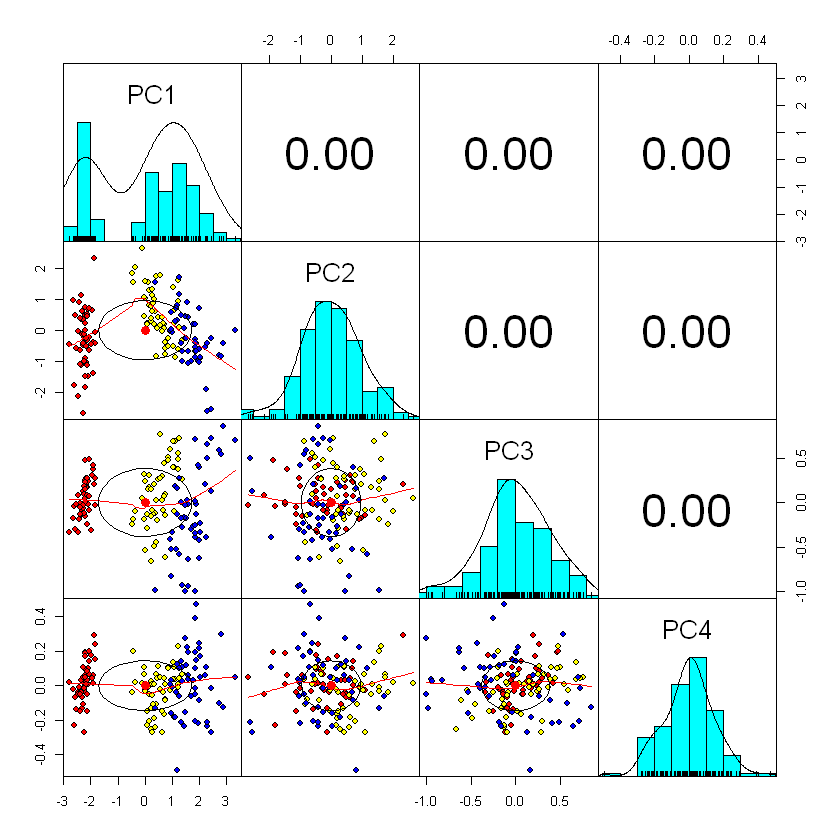

In [14]:
pairs.panels(x = pc_iris$x # for all the variables other than Species as it is a factor variable.
            , gap = 0
            , bg = c("red", "yellow", "blue")[iris$Species]
            , pch = 21
            )

The correlation coefficients are all zero. As PCs are orthogonal (perpendicular) to each other they are not correlated with each other the correlation between them is always zero. This get rid of the multicollinearity problem that occurs when variables are higly correlated. PCs are linear combination of normalized components and their correlation with each other is always zero. 